In [ ]:
import os
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns

In [ ]:
# # local
# path = "results/"
# year = "2014"
# for file in os.listdir(path):
#     if file == year:
#         df = pd.read_csv(path+file+"/results.csv")
#         print("Nam " + year +" kich thuoc :",df.shape)

In [ ]:
# drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
year = "2014"
df = pd.read_csv("/content/drive/MyDrive/Project /results.csv")
print("Nam " + year +" kich thuoc :",df.shape)

Nam 2014 kich thuoc : (31984, 21)


# Boston Marathon
* Ellbow method để chọn K 

In [ ]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31984 non-null  object 
 1   name       31984 non-null  object 
 2   division   31984 non-null  int64  
 3   25k        31984 non-null  object 
 4   gender     31984 non-null  object 
 5   age        31984 non-null  int64  
 6   official   31984 non-null  float64
 7   bib        31984 non-null  object 
 8   genderdiv  31984 non-null  int64  
 9   ctz        1244 non-null   object 
 10  35k        31984 non-null  object 
 11  overall    31984 non-null  int64  
 12  pace       31984 non-null  float64
 13  state      29408 non-null  object 
 14  30k        31984 non-null  object 
 15  5k         31984 non-null  object 
 16  half       31984 non-null  object 
 17  20k        31984 non-null  object 
 18  country    31984 non-null  object 
 19  city       31983 non-null  object 
 20  40k   

## EDA

* Detail data: 
    * Include: 31984 Rows, 21 Columns.
    * dtype: 2 float64 , 4 int64 and 15 object.
    * Missing Columns: `ctz`, `state` and `city`.
* Note: 
    * `5k, 10k,20k ,25k ,30k,35k ,40k`: run time(km).
    *  `division`: division place.(division winners)
    * `half` : Runner's time at halfway point
    * `overall` : ranking finishing
    * `official` : official time
    * `bib` :Assigned race number based on qualifying time.
    * `pace` : tốc độ (minute/mile)
    * `genderdiv` :thứ hạng trong giới tính
    * `ctz` : Runner's nationality 

In [ ]:
# attribute unique 
df.apply(lambda x: len(x.unique()))

10k           2766
name         31915
division      6979
25k           6570
gender           2
age             64
official     11030
bib          31984
genderdiv    17575
ctz             85
35k           9516
overall      31931
pace           727
state           69
30k           8090
5k            1491
half          5651
20k           5375
country         78
city          5935
40k          10546
dtype: int64

* Inside, attribute `bib` is keys table, and các số lượng các vận động viên gần như khác nhau `name`.

In [ ]:
# check dtype columns
for i in df["5k"].unique():
    try:
        float(i)
    except: 
        print(i)

-


In [ ]:
df = df.replace("-",np.nan)

In [ ]:
object_col = df.select_dtypes(include=['object'])
for col in object_col:
    try: 
        df[col] = df[col].astype(float)
        print(col)
    except:
        continue

10k
25k
35k
30k
5k
half
20k
40k


In [ ]:
df = df.fillna(df.mean())

In [ ]:
# statistic attribute
pd.set_option('float_format', '{:0.2f}'.format)
df.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00,31984.00
mean,51.80,1932.56,133.61,42.41,243.00,8051.04,196.86,15939.59,9.28,164.57,25.76,111.66,105.71,229.00
std,8.96,1715.23,25.51,11.32,52.30,4754.01,41.96,9232.98,1.99,33.93,4.32,21.04,19.76,49.13
min,16.62,1.00,45.80,18.00,80.60,1.00,67.42,1.00,3.08,56.45,7.75,38.03,36.10,76.10
25%,45.42,610.00,115.57,33.00,205.53,3972.00,167.15,7943.75,7.85,140.69,22.65,96.87,91.77,193.83
50%,50.35,1425.00,129.07,42.00,232.37,7970.00,188.22,15939.50,8.87,157.78,25.10,107.88,102.18,218.90
75%,57.15,2611.00,147.56,50.00,273.24,11968.00,220.12,23935.25,10.43,182.79,28.45,123.03,116.48,257.40
max,112.38,6979.00,289.02,81.00,538.88,17575.00,449.33,31931.00,20.57,376.38,86.95,236.67,224.35,508.35


* Nhìn chung dữ liệu numerical phân bố khá đều.
* Độ tuổi tham gia khá rộng trải dài từ 18 đến 81 tuổi.

In [ ]:
df.describe(include= "O")
# silhouette_score

,name,gender,bib,ctz,state,country,city
count,31984,31984,31984,1244,29408,31984,31983
unique,31915,2,31984,84,68,78,5934
top,"Murphy, John E.",M,34581,GBR,MA,USA,Boston
freq,2,17617,1,171,7587,27233,1034


* Phần lớn cuộc thi diễn ra ở Mỹ.
* Khá lớn dữ liệu thời gian bị thiếu với giá trị là `-`.
* Một số thí sinh thi 2 lần.
* Số lượng thí sinh nam nữ thi khá cân bằng.
* ...

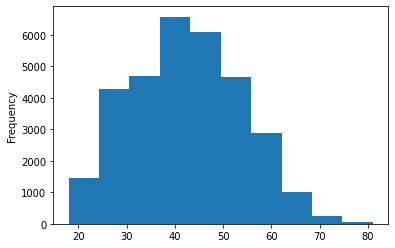

In [ ]:
# phân bố độ tuổi
# fig ,ax = plt.subplots(1,sharex=True, sharey=True, gridspec_kw={'wspace': 0})
df["age"].plot.hist()

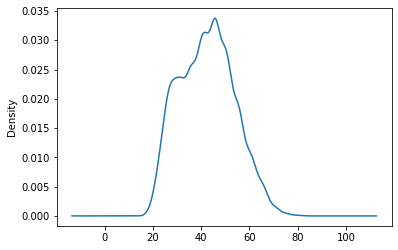

In [ ]:
df["age"].plot.kde()


* Nhìn chung phần lớn thí sinh dự thi trong khoảng 30-50 tuổi là chính.

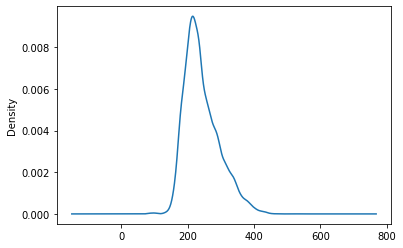

In [ ]:
df["official"].plot.kde()


* Biểu đồ có hình dạng long tail, phần lớn thi sinh thời gian chạy về đích chậm rất nhiều.

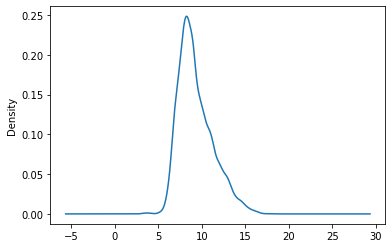

In [ ]:
df["pace"].plot.kde()



* Có hình dạng khá giống với biểu đồ mật độ thời gian về đích. ĐÓ cũng là điều hiển nhiên trong thực tế vì 2 thuộc tính `pace` và `official` có xu hướng tỷ lệ thuận với nhau khá cao.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of finish times per Age group')

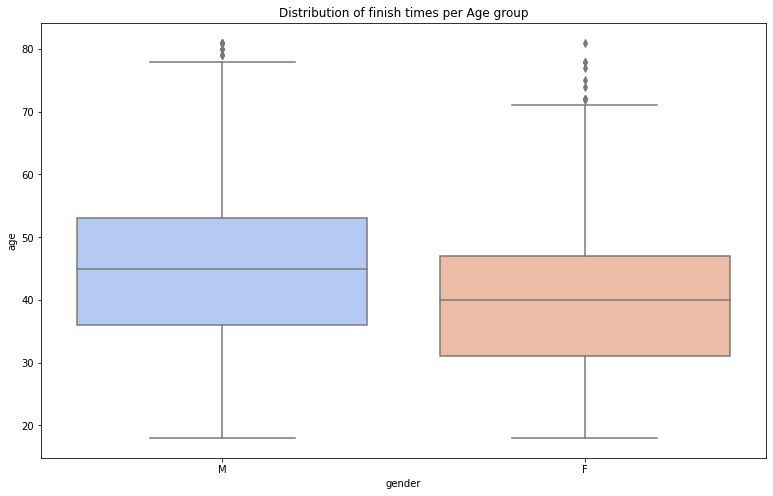

In [ ]:
box =sns.boxplot(df["gender"],df["age"],palette="coolwarm")
box.figure.set_size_inches(13,8)
box.set_title("Distribution age per gender")


* Trung bình tuổi các thí sinh nam có tuổi trung bình lớn hơn các thí nữ trong khoảng 5 tuổi.

Text(0.5, 1.0, 'Distribution official per Gender')

<Figure size 936x576 with 0 Axes>

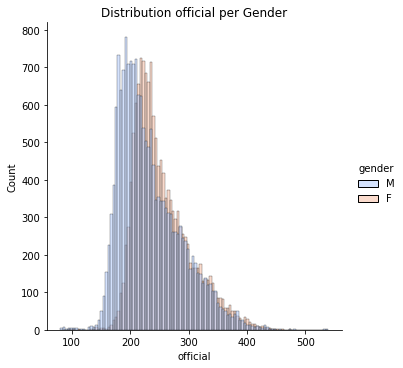

In [ ]:
plt.figure(figsize = (13,8))
sns.displot( x="official", hue="gender", data=df, palette="coolwarm")

plt.title("Distribution official per Gender")



* Trung bình thời gian hoàn thành của thí sinh nữ lớn hơn thí sinh nam.
* ĐỘ lệch chuẩn của nữ nhỏ hơn nam.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


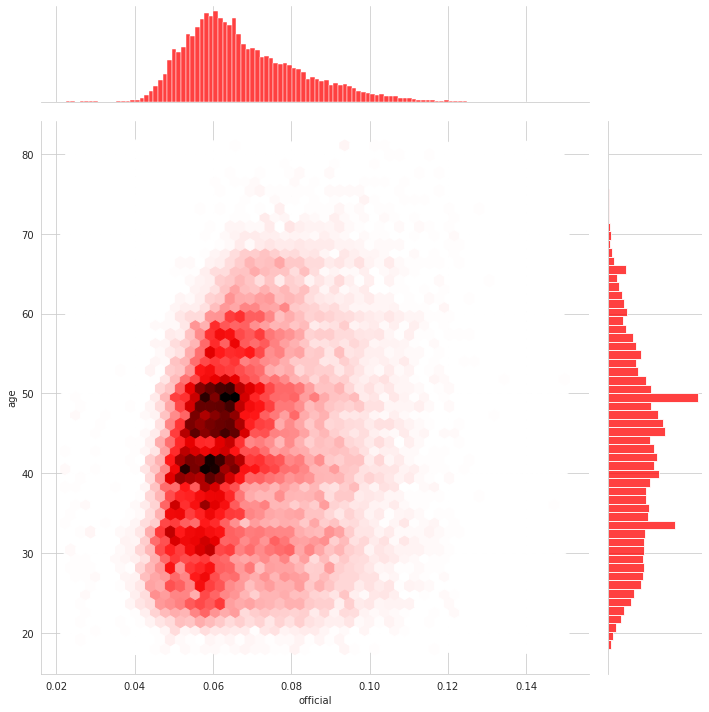

In [ ]:
ot = df["official"].apply(lambda x: x/3600)
sns.set_style("whitegrid")
g = sns.jointplot( x=ot, y=df['age'], kind='hex', color="r", size=10)

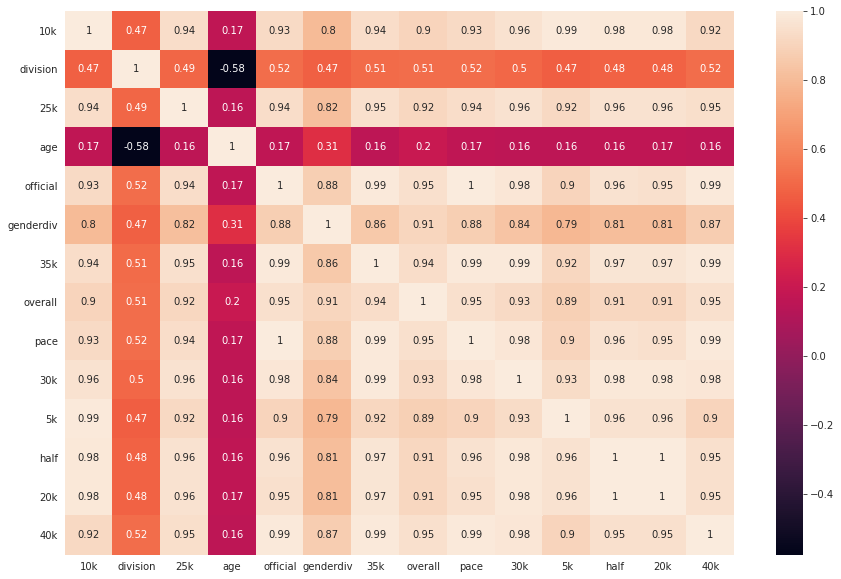

In [ ]:

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.select_dtypes(exclude=['object']).corr(), annot=True)


* phần lớn các thuộc tính có mối tương quan mạnh với nhau.
* Tuy nhiên `age` và `division` có mối liên tương quan kém với các thuộc tính khác.

## Preprocessing data

In [ ]:
df[["ctz","state","city"]].isnull().sum(axis = 0)

ctz      30740
state     2576
city         1
dtype: int64

In [ ]:
data = df.drop("ctz",axis = 1).dropna(axis = 0).reset_index(drop=True)
data.shape

(29408, 20)

In [ ]:
indexhierarchical = []
data.apply(lambda x: len(x.unique())) # division,genderdiv,gender,state


10k           2727
name         29348
division      6953
25k           6472
gender           2
age             64
official     10739
bib          29408
genderdiv    17216
35k           9289
overall      29387
pace           710
state           68
30k           7918
5k            1466
half          5556
20k           5285
country          2
city          4668
40k          10272
dtype: int64

In [ ]:
col_drop = ["name","bib","city","state"]
object_col = data.select_dtypes(include=['object'])
object_col = object_col.drop(col_drop,axis = 1)


for c in col_drop:
  indexhierarchical.append(("characteristics",c))

In [ ]:
dummi = pd.get_dummies(object_col, prefix=object_col.columns)

for dum in dummi.columns:
   indexhierarchical.append(("personas",dum))
dummi.head()

,gender_F,gender_M,country_CAN,country_USA
0,0,1,0,1
1,0,1,1,0
2,1,0,0,1
3,0,1,1,0
4,0,1,0,1


In [ ]:
# data.loc[:, data.columns.str.startswith("life")]
col_del = data.filter(regex='k$',axis=1).columns

In [ ]:
numerical = data.select_dtypes(exclude=['object']).drop(col_del,axis =1)
numerical.apply(lambda x: len(x.unique()))

division      6953
age             64
official     10739
genderdiv    17216
overall      29387
pace           710
half          5556
dtype: int64

In [ ]:
feature = ["division","genderdiv"]
dt = pd.concat([numerical[feature],dummi],axis = 1) 

for f in feature:
  indexhierarchical.append(("personas",f))

In [ ]:
for n in data.select_dtypes(exclude=['object']).drop(feature,axis = 1).columns:
  indexhierarchical.append(("characteristics",n))

In [ ]:
from sklearn.preprocessing import StandardScaler
dt_std = StandardScaler().fit_transform(dt)

In [ ]:
object_col = data.select_dtypes(include=['object']).drop(["name","bib","city"],axis = 1)
dummi = pd.get_dummies(object_col, prefix=object_col.columns)
dummi.head()

,gender_F,gender_M,state_AA,state_AB,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,state_BC,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_GU,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MB,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NB,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NL,state_NM,state_NS,state_NT,state_NV,state_NY,state_OH,state_OK,state_ON,state_OR,state_PA,state_PE,state_PR,state_QC,state_RI,state_SC,state_SD,state_SK,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_YT,country_CAN,country_USA
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_std = pd.concat([numerical[["division","genderdiv"]],dummi],axis = 1) 
data_std.shape

(29408, 74)

In [ ]:
from sklearn.preprocessing import StandardScaler
data_stand = StandardScaler().fit_transform(data_std)

In [ ]:
len(indexhierarchical)

22

In [ ]:
data_show =pd.concat([data.drop(object_col.columns,axis = 1),dummi],axis =1)
data_show.head()

,10k,name,division,25k,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,city,40k,gender_F,gender_M,country_CAN,country_USA
0,30.48,"Hall, Ryan",20,77.68,31,137.83,6,20,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,Redding,129.83,0,1,0,1
1,17.12,"Cassidy, Josh R.",13,48.88,29,87.40,W8,13,72.83,13,3.35,ON,60.82,8.02,40.20,38.02,Port Elgin,82.38,0,1,1,0
2,33.93,"Linden, Desiree",10,85.03,30,143.90,F8,10,119.68,46,5.50,MI,102.40,16.92,71.68,67.92,Rochester Hills,136.47,1,0,0,1
3,18.30,"Filteau, Michel",14,50.33,47,89.40,W13,14,74.95,14,3.42,QC,62.33,8.67,41.80,39.63,St-Jean Baptiste,84.48,0,1,1,0
4,18.78,"Kim, Gyu Dae",15,50.33,30,89.52,W14,15,75.02,15,3.42,IL,62.72,8.98,41.82,39.65,Champaign,84.75,0,1,0,1


In [ ]:
hierarchical = [tuple for i in data_show.columns for tuple in indexhierarchical if tuple[1] == i]

Specifically, use the tools at hand to determine which clustering
solution, including number of clusters and algorithm used, is best for
the marathon data. Once you have a solution you like, write a data
story, including visualizations, where you teach the reader something
about the Boston Marathon based on your clusters. Write up your
report, including your process from start to finish. You must include
analysis as:
1. Draw bar graphs (both male & female in different color) for each
cluster for male and female, from the bar graphs, you can tell things
as which cluster contains the most number of female (or male).
2. Draw bar graphs for runners in different ranges of age (dividing by 3
groups: 18-25, 26-40, 40-70 or so) for each cluster (in different colors),
from the graph, you should be able to anwser which cluster contains
the most young people, which cluster contains oldest people, etc.
3. Do the same things as above for finishing time (which group runs
fastest).

In [ ]:
t0 = time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
data_tsne = tsne.fit_transform(dt_std)
print("Execution time:",time() - t0)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 29408 samples in 0.324s...
[t-SNE] Computed neighbors for 29408 samples in 1.813s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29408
[t-SNE] Computed conditional probabilities for sample 2000 / 29408
[t-SNE] Computed conditional probabilities for sample 3000 / 29408
[t-SNE] Computed conditional probabilities for sample 4000 / 29408
[t-SNE] Computed conditional probabilities for sample 5000 / 29408
[t-SNE] Computed conditional probabilities for sample 6000 / 29408
[t-SNE] Computed conditional probabilities for sample 7000 / 29408
[t-SNE] Computed conditional probabilities for sample 8000 / 29408
[t-SNE] Computed conditional probabilities for sample 9000 / 29408
[t-SNE] Computed conditional probabilities for sample 10000 / 29408
[t-SNE] Computed conditional probabilities for sample 11000 / 29408
[t-SNE] Computed conditional probabilities for sample 12000 / 29408
[t-SNE] Computed conditional probabilities for sam

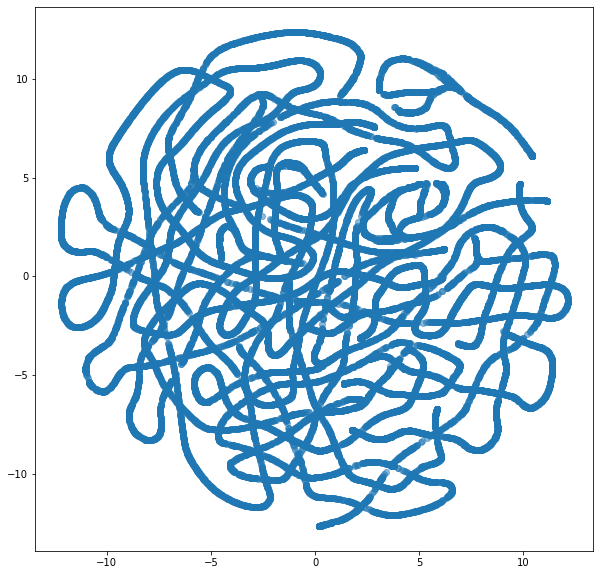

In [ ]:
df_tsne = pd.DataFrame(data_tsne, columns= ["0","1"])
plt.figure(figsize = (10,10))
plt.scatter("0","1",data = df_tsne,alpha = 0.5)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dt_std)
data_pca = pca.transform(dt_std)

In [ ]:
object_col.apply(lambda x: len(x.unique()))

gender     2
country    2
dtype: int64

### Kmeans

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=0).fit(dt_std)

In [ ]:
kmeans.labels_

array([0, 2, 1, ..., 1, 1, 0], dtype=int32)

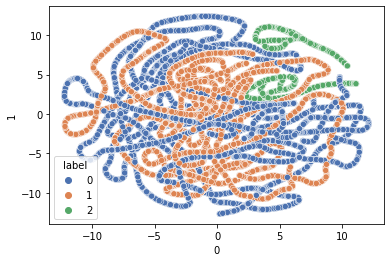

In [ ]:
df_tsne["label"] = kmeans.labels_
sns.scatterplot(data=df_tsne, x="0", y="1", hue="label", palette="deep")

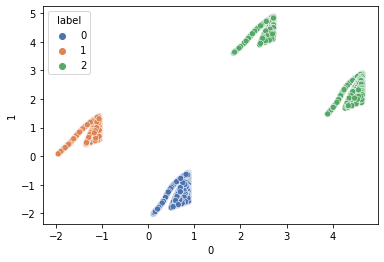

In [ ]:
df_pca = pd.DataFrame(data_pca, columns= ["0","1"])
df_pca["label"] = kmeans.labels_
sns.scatterplot(data=df_pca,x="0", y="1", hue="label", palette="deep")

Tuning K 

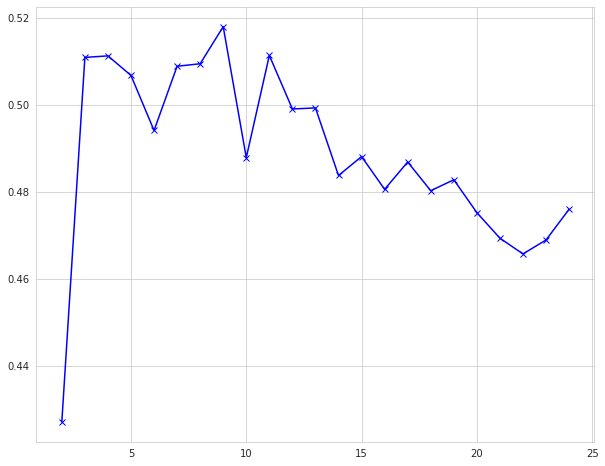

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist 
distortions = []
sil_score = []
iner = []
select_k = range(2,25)
data_stand = dt_std
for k in select_k:

  kmeans = KMeans(n_clusters=k).fit(data_stand)
  kmeans.fit(data_stand) 
  labels = kmeans.labels_
  sil_score.append(metrics.silhouette_score(data_stand, labels))
  iner.append(kmeans.inertia_)
  distortions.append(sum(np.min(cdist(data_stand, kmeans.cluster_centers_, 
                      'euclidean'),axis=1)) / data_stand.shape[0]) 

plt.figure(figsize = (10,8))
plt.plot(select_k,sil_score,'bx-')

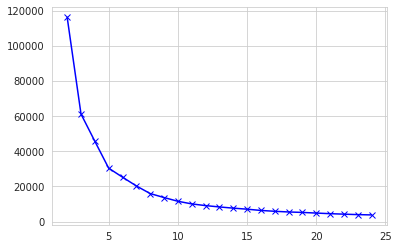

In [ ]:
plt.plot(select_k,iner,'bx-')

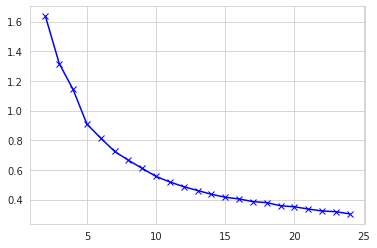

In [ ]:
plt.plot(select_k,distortions,'bx-')

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7eff8b6567b8>,
                 k=None, metric=None, model=None, timings=False)

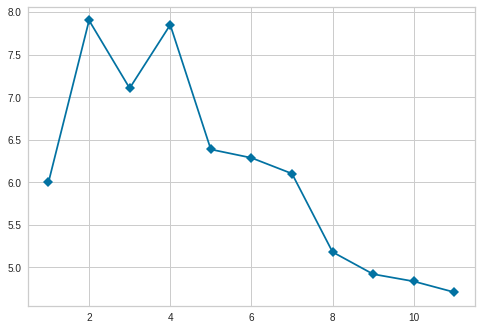

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,12), timings=False)
visualizer.fit(dt_std)        # Fit the data to the visualizer

### DBCAN

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=2).fit(data_pca)

In [ ]:
labels  = db.labels_
print(set(labels))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

{0, 1, 2, 3}


In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Silhouette Coefficient: 0.831


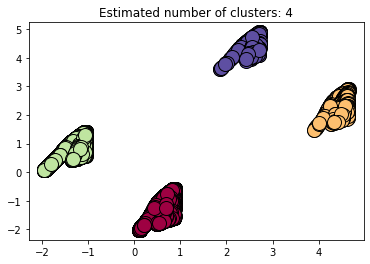

In [ ]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data_pca, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=20).fit(data_tsne)

In [ ]:
labels  = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Silhouette Coefficient: -0.557
SO mau noise:  387


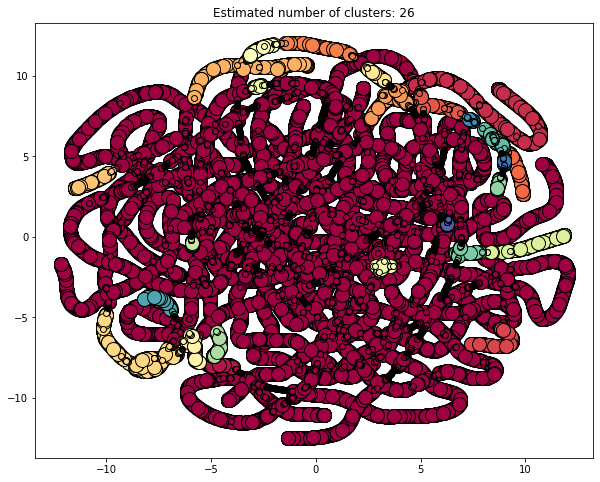

In [ ]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data_tsne, labels))
print("SO mau noise: ",n_noise_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(10,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data_tsne[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data_tsne[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

###  SpectralClustering

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=2,random_state=0).fit(data_pca)
clustering.labels_
# không thể thực hiện full ram

### Gaussian mixtures

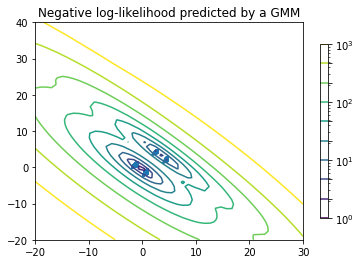

In [ ]:
from matplotlib.colors import LogNorm
from sklearn import mixture
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(data_pca)


# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(data_pca[:, 0], data_pca[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

# Insight cluster


* Theo như các phương pháp xác định số k trên thì số cluster phù hợp nằm trong khoảng 2-10
* Và hình dạng cấu trúc dữ liệu là những đường cong mật độ gần nhau.
->  Do đó, Chọn phương pháp Cluster DBSCAN để thực hiện cluster.

In [ ]:
from sklearn.cluster import DBSCAN
data_stand = dt_std
db = DBSCAN(eps=0.5, min_samples=50).fit(data_stand) # 0.5 :20 , 2:5  ,0.7:10 , 0.7:20, 
labels  = db.labels_
print(set(labels))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

from sklearn import metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_stand, labels))
print("Estimated number of noise: ",n_noise_)
print('Estimated number of clusters: %d' % n_clusters_)



{0, 1, 2, 3, -1}
Silhouette Coefficient: 0.509
Estimated number of noise:  52
Estimated number of clusters: 4


In [ ]:
pd.DataFrame(labels,columns=["0"]).value_counts()

0 
 0    14449
 2    12784
 1      912
 3      782
-1      330
 4       95
 5       56
dtype: int64

* Số lượng mẫu ở các cluster của nhóm 0 và nhóm 2 khá chênh lệch với 2 nhóm còn lại.

In [ ]:
from sklearn.cluster import DBSCAN

db1 = DBSCAN(eps=1, min_samples=2).fit(data_stand) # 5 ,50: 6,30 - 0.476: 7 ,10  - 0.433:6 ,5 : 0.48
labels  = db1.labels_
core_samples_mask = np.zeros_like(db1.labels_, dtype=bool)
core_samples_mask[db1.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

from sklearn import metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_stand, labels))
print("Estimated number of noise: ",n_noise_)
print('Estimated number of clusters: %d' % n_clusters_)

Silhouette Coefficient: 0.547
Estimated number of noise:  38
Estimated number of clusters: 141


In [ ]:
pd.DataFrame(labels,columns=["0"]).value_counts()

0  
16     3929
21     3658
0      1225
22     1101
27      878
       ... 
130       2
135       2
133       2
102       2
140       2
Length: 142, dtype: int64

In [ ]:
data_float = data.select_dtypes(exclude = ["object"])
data_obj = data.select_dtypes(include=["object"])
data_float["labels"] = db.labels_
data_obj["labels"] = db.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data_obj.groupby("labels").agg(lambda x: x.value_counts().index[0])

,name,gender,bib,state,country,city
labels,,,,,,
-1,"Loughran, Jen L.",M,30297,ON,CAN,Toronto
0,"Young, Bob",M,4203,MA,USA,Boston
1,"Girard, Mathieu",M,852,ON,CAN,Toronto
2,"Sherman, Bonnie",F,25807,MA,USA,Boston
3,"Marshall, Tracy D",F,30103,ON,CAN,Toronto


In [ ]:
data_float.groupby("labels").agg(["mean"])

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
labels,,,,,,,,,,,,,,
-1,63.470333,5632.766667,166.317402,32.133333,317.818000,14470.300000,256.182000,28241.700000,12.130667,210.748333,31.209000,139.474000,131.935000,300.142000
0,49.933784,1829.706900,128.490708,43.860129,235.211939,8907.102498,189.642724,14186.474081,8.978433,158.185749,24.879200,107.339778,101.603866,221.317539
1,47.288775,1099.414216,121.088614,48.963235,219.032843,7632.253268,176.993333,11358.338235,8.362018,148.282827,23.580903,101.238549,95.895237,206.307444
2,54.740148,2279.782150,141.684999,39.210967,256.158981,7262.727785,208.590384,18632.759309,9.777771,174.721191,27.158295,118.440377,112.129770,241.828716
3,52.179053,1128.701412,134.279396,44.996743,239.638578,6086.281216,195.319837,16464.245385,9.148208,164.138450,25.966305,112.069689,106.176562,226.207839


**Kmean**

* Thực hiện phương pháp Kmean để so sánh độ hiểu quả so với phương pháp DBSCAN

In [ ]:
from sklearn.cluster import KMeans

describeK = pd.DataFrame()
K = range(4,11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=0).fit(dt_std)
  labels = kmeans.labels_
  describeK[k] = pd.DataFrame(labels,columns=["0"]).value_counts().describe()

In [ ]:
describeK

,4,5,6,7,8,9,10
count,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
mean,7352.000000,5881.600000,4901.333333,4201.142857,3676.000000,3267.555556,2940.800000
std,5738.947929,3083.924334,2140.129871,1741.358227,2115.243991,1952.142484,1341.839517
min,2175.000000,2175.000000,2175.000000,2175.000000,933.000000,933.000000,933.000000
25%,2978.250000,3246.000000,3462.500000,2866.000000,2081.250000,2082.000000,2084.000000
50%,6392.000000,6788.000000,4706.000000,3725.000000,3548.000000,2405.000000,3064.500000
75%,10765.750000,7661.000000,6515.750000,5553.000000,5485.500000,4472.000000,4111.000000
max,14449.000000,9538.000000,7654.000000,6670.000000,6670.000000,6670.000000,4461.000000


* Số lượng mẫu các nhóm chênh lệch cũng khá lớn với K =4
* Số lượng cluster càng lớn thì mật độ giữa các cluster trở nên dần đều hơn.

In [ ]:
from sklearn.cluster import KMeans
# select K = 4
kmeans = KMeans(n_clusters=4, random_state=0).fit(dt_std)
labels = kmeans.labels_

data_float = data.select_dtypes(exclude = ["object"])
data_obj = data.select_dtypes(include=["object"])
data_float["labels"] = kmeans.labels_
data_obj["labels"] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


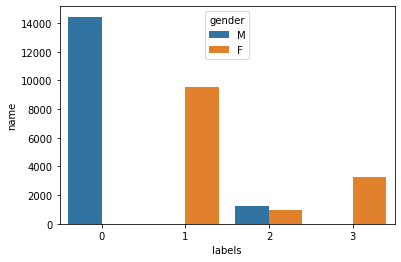

In [ ]:
group = data_obj.groupby(["labels","gender"])["name"].count().reset_index()
ax = sns.barplot(x="labels", y="name", hue="gender", data=group)

* Các vận động viên nam phần lớn giống nhau vì tập trung đông ở một nhóm.
* Các vận động viên nữ đa dạng hơn phân bố ở nhiều nhóm khác nhau.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


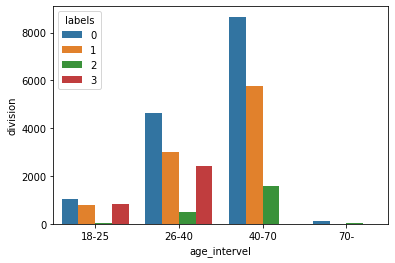

In [ ]:
# 18-25, 26-40, 40-70 or so
def map(x):
  if x > 70 : return "70-"
  elif x > 40: return "40-70"
  elif x > 26: return "26-40"
  else: return "18-25"
data_float["age_intervel"] = data_float["age"].apply(map )

group = data_float.groupby(["labels","age_intervel"])["division"].count().reset_index()
ax = sns.barplot(x="age_intervel", y="division", hue="labels", data=group)

* Độ tuổi tập trung chủ yếu khoảng 26-70
* Nhóm 3 là tập hợp những người trẻ tuổi dưới 40
* Nhóm 2 là tập hợp những người già cao tuổi.
* Nhóm 1 và nhóm 0 tập hợp những có độ tuổi tương tự nhau.
-- `Có thể cảm nhận 3 nhóm sẽ tốt hơn. Nhưng độ chênh lệch về số lượng các nhóm sẽ càng cao.`

In [ ]:
print("\\n")

\n


In [ ]:
columns = pd.MultiIndex.from_tuples(hierarchical)
columns

MultiIndex([('characteristics',         '10k'),
            ('characteristics',        'name'),
            (       'personas',    'division'),
            ('characteristics',         '25k'),
            ('characteristics',         'age'),
            ('characteristics',    'official'),
            ('characteristics',         'bib'),
            (       'personas',   'genderdiv'),
            ('characteristics',         '35k'),
            ('characteristics',     'overall'),
            ('characteristics',        'pace'),
            ('characteristics',       'state'),
            ('characteristics',         '30k'),
            ('characteristics',          '5k'),
            ('characteristics',        'half'),
            ('characteristics',         '20k'),
            ('characteristics',        'city'),
            ('characteristics',         '40k'),
            (       'personas',    'gender_F'),
            (       'personas',    'gender_M'),
            (       'personas', 'country

In [ ]:
data_show.columns = columns

In [ ]:
data_show = data_show.sort_index(axis = 1,ascending=False) 

In [ ]:
data_show["labels"] = kmeans.labels_

In [ ]:
data_show

personas                             ... characteristics                labels
      genderdiv gender_M gender_F division  ...             25k     20k    10k       
0            20        1        0       20  ...           77.68   61.78  30.48      0
1            13        1        0       13  ...           48.88   38.02  17.12      2
2            10        0        1       10  ...           85.03   67.92  33.93      1
3            14        1        0       14  ...           50.33   39.63  18.30      2
4            15        1        0       15  ...           50.33   39.65  18.78      0
...         ...      ...      ...      ...  ...             ...     ...    ...    ...
29403      7500        1        0     3414  ...          124.02   99.55  50.72      0
29404     15459        1        0     5212  ...          165.02  128.37  61.28      0
29405     10788        0        1     5231  ...          157.02  123.33  59.00      3
29406     12009        0        1     5800  ...          167.82  129.90  63.75      3
29407      9771        1        0     1396  ...          135.02  108.03  53.63      0

[29408 rows x 23 columns]

In [ ]:
frequency = data_show.groupby("labels").agg(lambda x: x.value_counts().index[0])
frequency

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


personas                    ... characteristics                   
       genderdiv gender_M gender_F  ...             25k         20k    10k
labels                              ...                                   
0             19        1        0  ...      133.612055  105.711669  42.20
1             10        0        1  ...      133.612055  105.711669  48.30
2           5941        1        0  ...      111.750000   94.050000  48.02
3          10239        0        1  ...      133.612055  123.180000  69.92

[4 rows x 22 columns]

**Đánh giá**:

* Nhóm 2 phần lớn thuộc `state` ON và thành phố Toronto
* Phần lớn thí sinh ở Boston và MA
* Nhóm 0 là nhóm có thành tích tệ nhất và điều đáng buồn là phần lớn là đàn ông ở nhóm này.
* Tuy nhiên nhóm 2 thành tích cao vẫn chủ yếu là đàn ông, chứng tỏ đàn ông có sự vượt bậc trong thành tích.
* còn Nữ tập trung nhiều trong 2 nhóm (1,3) có thành tích khá cao và ổn định.

In [ ]:
data_show.groupby("labels").agg(["mean"])

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


personas                      ... characteristics                       
           genderdiv  gender_M  gender_F  ...             25k         20k        10k
                mean      mean      mean  ...            mean        mean       mean
labels                                    ...                                       
0        8907.102498  1.000000  0.000000  ...      128.490708  101.603866  49.933784
1        6087.259488  0.000000  1.000000  ...      135.700589  107.629503  52.773650
2        7071.931954  0.571034  0.428966  ...      127.298074  100.745946  49.582748
3       10716.707024  0.000000  1.000000  ...      159.269504  125.353291  60.518476

[4 rows x 18 columns]

**Đánh giá:**

* Nhóm 2 tập hợp những người ở CAN.
* Nhóm người có `pace` cao thì tập hợp những người có `age` trung bình thấp (tập trung vào những người trẻ)
* Những người lớn tuổi có tốc độ thấp lại có kết quả tốt hơn trong cuộc thi vì kinh nghiệm thi đấu của họ nhiều.
* Tốc độ trung bình cao không nói nên được kết quả của cuộc thi phụ thuộc vào độ bền sự dẻo dai.
* Những người có thành tích tốt thuộc nhóm 2 (Thuộc miền quê CAN, tốc độ thấp, độ tuổi cao, thời gian tốt, xếp hạng cao).  

# Conclusion

**Kmean**
* Thuật toán Kmeans rất dễ để sử dụng và tốc độ tính toán nhanh hơn các thuật toán khác.
* Được dùng nhiều trong đa số các trường vì nó cho cái nhìn khá tốt về dữ liệu
* Không hiệu quả đối với các hình dạng dữ liệu phức tập tập trung liên kết với nhau.

**DBSCAN** 
* Có thể xác định được các node ngoại lại và tự động phân chia số cụm.
* Phù hợp với bài toán dữ liệu liên kết liên tục với nhau.
* Khó khăn trong việc chọn bộ tham số esp và minsample.

* `Tóm lại mỗi thuật toán cluster sẽ phù hợp để giải quyết trong từng bài toán cụ thể nào đó.`